In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Conv1D, MaxPooling1D, Dense, Flatten
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv(r'C:\Users\evano\Documents\Magang BMKG\DataSet STEAD\sample_data.csv')

In [4]:
df

,trace_start_time,source_origin_time,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_latitude,source_longitude,source_depth_km,source_magnitude,source_magnitude_type,source_distance_deg,source_distance_km,back_azimuth_deg,trace_category,trace_name
0,2014-12-26 21:14:46.630000,2014-12-26 21:14:52.860000,46.850850,-121.792950,3365.0,700.0,0.79,0.770000,762.000,1.00,46.84650,-121.76083,1.10,-0.50,md,0.02247,2.50,101.20,earthquake_local,STAR.UW_20141226211445_EV
1,2015-09-07 11:33:17.099940,2015-09-07 11:33:19.767000,39.351700,-120.320500,2268.0,600.0,0.95,3.332940,836.380,0.93,39.50050,-120.31180,6.30,-0.42,ml,0.14900,16.54,2.59,earthquake_local,DON.NN_20150907113316_EV
2,2015-03-02 18:19:41.540000,2015-03-02 18:19:48.790000,46.850850,-121.792950,3365.0,800.0,1.00,0.750000,857.000,0.82,46.84633,-121.76383,1.29,-0.39,md,0.02049,2.28,102.80,earthquake_local,STAR.UW_20150302181940_EV
3,2015-08-29 21:07:32.710000,2015-08-29 21:07:35.660000,46.750599,-121.809601,853.0,500.0,0.87,2.050000,673.000,0.85,46.84900,-121.73733,2.09,-0.36,md,0.11030,12.25,26.70,earthquake_local,LON.UW_20150829210731_EV
4,2017-04-05 10:40:49.439010,2017-04-05 10:40:52.799000,36.724600,-116.975900,747.0,700.0,0.95,3.640010,932.051,0.93,36.59980,-117.07220,7.10,-0.30,ml,0.14700,16.31,211.73,earthquake_local,HEL.SN_20170405104048_EV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,2014-11-16 22:33:49.600000,2014-11-16 22:33:23.38,-38.259249,177.110894,95.0,700.0,0.50,33.220001,3529.000,0.78,-37.59890,179.61090,34.50,6.70,mw,2.08000,231.68,250.80,earthquake_local,URZ.NZ_20141116223348_EV
567,2018-11-30 17:29:37.775000,2018-11-30 17:29:29.330000,61.498200,-151.834900,945.0,800.0,0.50,16.445000,2108.400,0.52,61.34640,-149.95520,46.70,6.80,ml,0.91200,101.23,100.41,earthquake_local,STLK.AV_20181130172937_EV
568,2014-03-10 05:18:36.220000,2014-03-10 05:18:13.59,40.974000,-122.705000,937.0,700.0,0.50,29.629999,2943.000,0.50,40.72350,-125.08690,6.09,6.90,mw,1.82000,202.77,81.30,earthquake_local,N02D.TA_20140310051835_EV
569,2014-04-03 02:43:34.220000,2014-04-03 02:43:14.26,-19.668500,-69.194200,3809.0,700.0,0.50,26.959999,1804.000,0.57,-20.58870,-70.49050,11.98,7.70,mw,1.52000,169.56,53.30,earthquake_local,GO01.C_20140403024333_EV


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trace_start_time       571 non-null    object 
 1   source_origin_time     571 non-null    object 
 2   receiver_latitude      571 non-null    float64
 3   receiver_longitude     571 non-null    float64
 4   receiver_elevation_m   571 non-null    float64
 5   p_arrival_sample       571 non-null    float64
 6   p_weight               571 non-null    float64
 7   p_travel_sec           571 non-null    float64
 8   s_arrival_sample       571 non-null    float64
 9   s_weight               571 non-null    float64
 10  source_latitude        571 non-null    float64
 11  source_longitude       571 non-null    float64
 12  source_depth_km        571 non-null    float64
 13  source_magnitude       571 non-null    float64
 14  source_magnitude_type  571 non-null    object 
 15  source

In [6]:
df['trace_start_time'] = pd.to_datetime(df['trace_start_time'], infer_datetime_format=True)
df['source_origin_time'] = pd.to_datetime(df['source_origin_time'], infer_datetime_format=True)

In [7]:
df.dtypes

trace_start_time         datetime64[ns]
source_origin_time       datetime64[ns]
receiver_latitude               float64
receiver_longitude              float64
receiver_elevation_m            float64
p_arrival_sample                float64
p_weight                        float64
p_travel_sec                    float64
s_arrival_sample                float64
s_weight                        float64
source_latitude                 float64
source_longitude                float64
source_depth_km                 float64
source_magnitude                float64
source_magnitude_type            object
source_distance_deg             float64
source_distance_km              float64
back_azimuth_deg                float64
trace_category                   object
trace_name                       object
dtype: object

In [8]:
df.describe()

,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_latitude,source_longitude,source_depth_km,source_magnitude,source_distance_deg,source_distance_km,back_azimuth_deg
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,34.585338,-102.806399,979.049825,672.762522,0.601594,13.493864,1702.324492,0.563117,34.528486,-100.944459,21.871349,2.628441,0.733822,81.531751,180.423185
std,18.792072,60.845852,800.977816,174.914707,0.229486,11.200863,899.055274,0.272170,18.697520,63.942124,33.839391,1.749306,0.686453,76.264814,104.504425
min,-42.415980,-177.985300,-13.000000,398.000000,0.000000,0.480000,451.000000,0.000000,-41.685600,-178.979200,-0.340000,-0.500000,0.000900,0.100000,0.600000
25%,33.316855,-122.795303,390.000000,500.000000,0.500000,3.980000,976.500000,0.500000,32.950582,-122.776751,4.760000,1.155000,0.178050,19.800000,94.250000
50%,35.935700,-116.942410,939.000000,700.000000,0.580000,10.830000,1490.000000,0.580000,35.849667,-116.921900,9.990000,2.580000,0.556100,61.850000,168.000000
75%,40.321970,-115.445745,1374.800000,800.000000,0.715000,19.485001,2162.500000,0.750000,40.422417,-115.260417,16.425000,4.005000,1.001415,111.155000,279.750000
max,69.243000,179.300000,4131.000000,1000.000000,1.000000,48.340000,4958.000000,1.000000,69.520500,179.610900,253.730000,7.900000,2.950000,327.220000,359.800000


<AxesSubplot:xlabel='trace_start_time'>

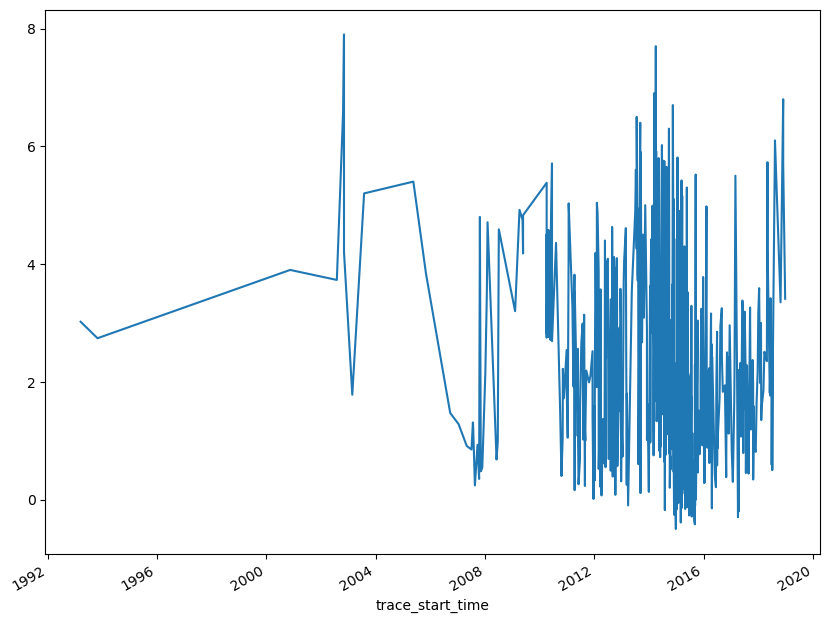

In [9]:
df.set_index('trace_start_time')['source_magnitude'].plot()

In [10]:
df.source_magnitude.values

array([-0.5 , -0.42, -0.39, -0.36, -0.3 , -0.29, -0.27, -0.26, -0.25,
       -0.24, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13,
       -0.12, -0.11, -0.1 , -0.07, -0.06, -0.04, -0.03, -0.02, -0.01,
        0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ,

In [11]:
X = df
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

X_numeric = X.select_dtypes(include=['float64', 'int64']).values
y = df.source_magnitude

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
X_scaled

array([[ 0.65326838, -0.31231708,  2.98140866, ..., -1.03718007,
        -1.03718927, -0.7587492 ],
       [ 0.25385925, -0.28809618,  1.6106318 , ..., -0.85269415,
        -0.85293247, -1.70317296],
       [ 0.65326838, -0.31231708,  2.98140866, ..., -1.04006699,
        -1.04007649, -0.74342542],
       ...,
       [ 0.3402639 , -0.32731974, -0.05254415, ...,  1.58369217,
         1.59109483, -0.94933872],
       [-2.88959129,  0.55289997,  3.53621716, ...,  1.1462799 ,
         1.15525664, -1.21750488],
       [ 1.41568038, -0.77922545, -1.14591676, ...,  2.92508979,
         2.93050001,  0.25357807]])

In [13]:
X_numeric

array([[ 4.6850850e+01, -1.2179295e+02,  3.3650000e+03, ...,
         2.2470000e-02,  2.5000000e+00,  1.0120000e+02],
       [ 3.9351700e+01, -1.2032050e+02,  2.2680000e+03, ...,
         1.4900000e-01,  1.6540000e+01,  2.5900000e+00],
       [ 4.6850850e+01, -1.2179295e+02,  3.3650000e+03, ...,
         2.0490000e-02,  2.2800000e+00,  1.0280000e+02],
       ...,
       [ 4.0974000e+01, -1.2270500e+02,  9.3700000e+02, ...,
         1.8200000e+00,  2.0277000e+02,  8.1300000e+01],
       [-1.9668500e+01, -6.9194200e+01,  3.8090000e+03, ...,
         1.5200000e+00,  1.6956000e+02,  5.3300000e+01],
       [ 6.1165600e+01, -1.5017750e+02,  6.2000000e+01, ...,
         2.7400000e+00,  3.0483000e+02,  2.0690000e+02]])

In [14]:
y.values

array([-0.5 , -0.42, -0.39, -0.36, -0.3 , -0.29, -0.27, -0.26, -0.25,
       -0.24, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13,
       -0.12, -0.11, -0.1 , -0.07, -0.06, -0.04, -0.03, -0.02, -0.01,
        0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ,

In [15]:
from sklearn.model_selection import train_test_split

X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

# Building a CNN Model




Epoch 1/50

15/15 [==============================] - 4s 46ms/step - loss: 5.6963 - val_loss: 2.3887
Epoch 2/50
15/15 [==============================] - 0s 13ms/step - loss: 1.7620 - val_loss: 1.3389
Epoch 3/50
15/15 [==============================] - 0s 13ms/step - loss: 1.3329 - val_loss: 0.9787
Epoch 4/50
15/15 [==============================] - 0s 14ms/step - loss: 0.9613 - val_loss: 0.6380
Epoch 5/50
15/15 [==============================] - 0s 13ms/step - loss: 0.6823 - val_loss: 0.5059
Epoch 6/50
15/15 [==============================] - 0s 13ms/step - loss: 0.5643 - val_loss: 0.4789
Epoch 7/50
15/15 [==============================] - 0s 13ms/step - loss: 0.3186 - val_loss: 0.2185
Epoch 8/50
15/15 [==============================] - 0s 13ms/step - loss: 0.1924 - val_loss: 0.1920
Epoch 9/50
15/15 [==============================] - 0s 13ms/step - loss: 0.1403 - val_loss: 0.1145
Epoch 10/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0836 - val_loss: 0.1729
Epoch

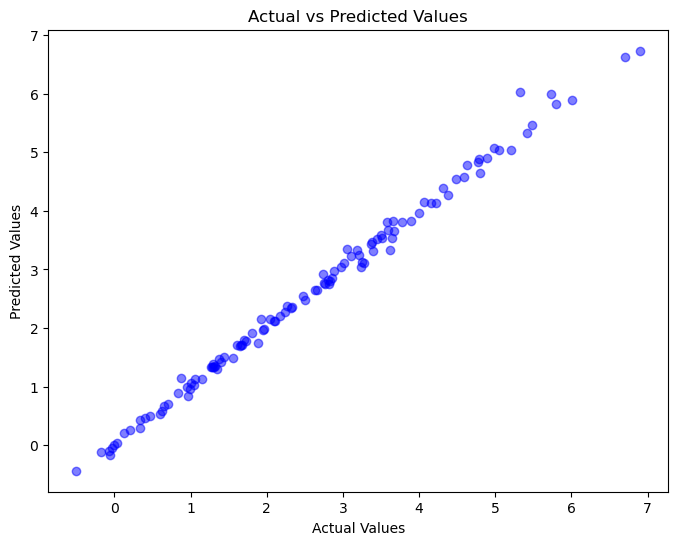

Mean Squared Error (MSE): 0.013863978077003665
Mean Absolute Error (MAE): 0.08156136110295419
R-squared (R2): 0.9950268039116438


In [16]:
X_scaled_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
input_shape = (X_scaled_reshaped.shape[1], X_scaled_reshaped.shape[2])
input_layer = Input(shape=input_shape)

conv1d_1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
conv1d_2 = Conv1D(filters=64, kernel_size=3, activation='relu')(conv1d_1)
conv1d_3 = Conv1D(filters=64, kernel_size=3, activation='relu')(conv1d_2)

max_pooling1d = MaxPooling1D(pool_size=2)(conv1d_3)

flatten = Flatten()(max_pooling1d)

dense_1 = Dense(units=128, activation='relu')(flatten)
dense_2 = Dense(units=64, activation='relu')(dense_1)
dense_3 = Dense(units=32, activation='relu')(dense_2)

output_layer = Dense(units=1, activation='linear')(dense_3)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_numeric_train, y_train, validation_data=(X_numeric_test, y_test), epochs=50)

predictions = model.predict(X_numeric_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = r2_score(y_test, predictions)
print(f"R-squared (R2): {r2}")